<a href="https://colab.research.google.com/github/hburnt/Machine-Learning/blob/main/intro_to_ml/SVM/Support_Vector_Machine_PCA.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

              precision    recall  f1-score   support

           0       1.00      1.00      1.00        67
           1       1.00      1.00      1.00        47

    accuracy                           1.00       114
   macro avg       1.00      1.00      1.00       114
weighted avg       1.00      1.00      1.00       114



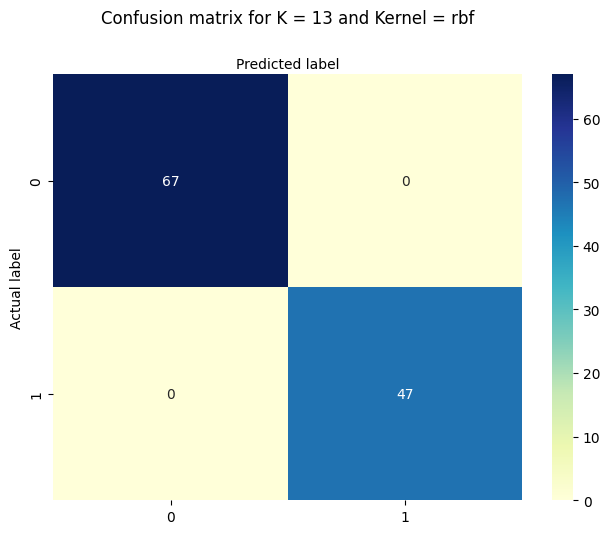

In [36]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.decomposition import KernelPCA
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

url = 'https://raw.githubusercontent.com/hburnt/Intro-to-ML-datasets/main/cancer.csv'

dataset = pd.DataFrame(pd.read_csv(url))
dataset.head()

def binary_map(x):
  return x.map({'M': 1, 'B': 0})

varlist = ['diagnosis']
dataset[varlist] = dataset[varlist].apply(binary_map)

dataset.isnull().sum()
dataset.isna().sum()

# Separating inputs and outputs
inputs = dataset.iloc[:, 2:32].values
outputs = dataset.iloc[:,1].values

sc_inputs = StandardScaler()
inputs = sc_inputs.fit_transform(inputs)

# PCA feature extration
K = [13]

for N in K:
  kernelfunc = kernelFunctions[i]
  pca = KernelPCA(n_components=N, kernel = 'rbf')
  principalComponents = pca.fit_transform(inputs)
  principalDF = pd.DataFrame(data = principalComponents)
  newInputs = principalDF.values

  train_inputs, test_inputs, train_outputs, test_outputs = train_test_split(newInputs, outputs, test_size = 0.2, random_state = 0)
  model = SVC(kernel = 'rbf', C = 2)
  model.fit(train_inputs, train_outputs)

  Output_prediction = model.predict(test_inputs)

  cnf_matrix = confusion_matrix(test_outputs, Output_prediction)
  report  = classification_report(test_outputs, Output_prediction)

  print(report)

  class_names = [0, 1]
  fig, ax = plt.subplots()
  tick_marks = np.arange(len(class_names))
  plt.xticks(tick_marks, class_names)
  plt.yticks(tick_marks, class_names)
  # create heatmap
  sns.heatmap(pd.DataFrame(cnf_matrix), annot=True, cmap="YlGnBu" ,fmt='g')
  ax.xaxis.set_label_position("top")
  plt.tight_layout()
  plt.title(f"Confusion matrix for K = %d and Kernel = %s" % (N, kernelfunc) , y=1.1)
  plt.ylabel('Actual label')
  plt.xlabel('Predicted label')